In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm

import os
scores_df = pd.read_parquet(os.path.expanduser('~/smolmodels/data/scored_sorted_logprobs.parquet'))
scores_df.describe()

In [ ]:
scores_df = scores_df[
    [
        "chosen_logps",
        "rejected_logps",
        "mean_chosen_logits",
        "mean_rejected_logits",
    ]
]
scores_df['logprobs_diff'] = scores_df['chosen_logps'] - scores_df['rejected_logps']
scores_df['logits_diff'] = scores_df['mean_chosen_logits'] - scores_df['mean_rejected_logits']
scores_df.hist(bins=100, figsize=(20, 10))

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

for i, col in enumerate(["logprobs_diff", "logits_diff"]):
    mean, std = scores_df[col].mean(), scores_df[col].std()
    stat, p = shapiro(scores_df[col])
    print(f"Shapiro-Wilk score: {stat}, p-value: {p}")
    print(f"{col} mean: {mean}, std: {std}")
    pdf_bins = [10, 50, 90, 100]
    pdf_labels = ['10-50', '50-90', '90-100']
    percentile_bins = norm.ppf([x/100 for x in pdf_bins], loc=mean, scale=std)
    print(f"{col} 10th, 50th, 90th percentiles: {percentile_bins}")
    scores_df[f"{col}_percentile_idx"] = pd.cut(scores_df[col], bins=percentile_bins, labels=pdf_labels, include_lowest=True, right=True)
    axs[i].hist(scores_df[col], bins=100)
    axs[i].axvline(mean, color='r', linestyle='dashed', linewidth=1)
    axs[i].axvline(mean + std, color='r', linestyle='dashed', linewidth=1)
    axs[i].axvline(mean - std, color='r', linestyle='dashed', linewidth=1)
    axs[i].set_title(col)

In [ ]:
scores_df.logprobs_diff.hist(bins=100)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

col = "logprobs_diff"
mean, std = scores_df[col].mean(), scores_df[col].std()
pdf_bins = [10, 50, 90, 100]
pdf_labels = ['10-50', '50-90', '90-100']
percentile_bins = norm.ppf([x/100 for x in pdf_bins], loc=mean, scale=std)
print(f"{col} 10th, 50th, 90th percentiles: {percentile_bins}")
scores_df[f"{col}_percentile_idx"] = pd.cut(scores_df[col], bins=percentile_bins, labels=pdf_labels, include_lowest=True, right=True) # type: ignore
ax.hist(scores_df[col], bins=100)
ax.axvline(mean, color='r', linestyle='dashed', linewidth=1)
ax.axvline(mean + std, color='r', linestyle='dashed', linewidth=1)
ax.axvline(mean - std, color='r', linestyle='dashed', linewidth=1)
ax.set_title("Histogram of per-sample logprob distances")
scores_df['logprobs_diff_rank_sorted']

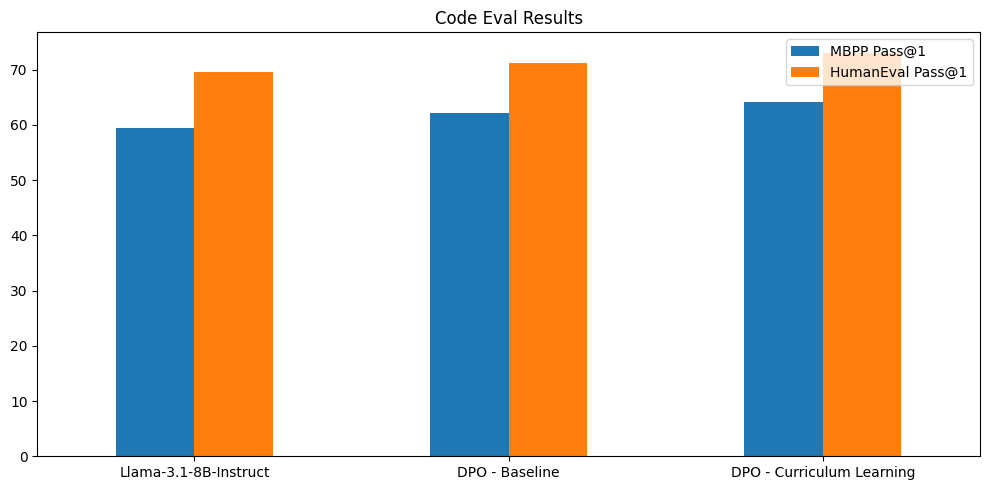

In [54]:
import pandas as pd

MBPP = "MBPP Pass@1"
HUMANEVAL = "HumanEval Pass@1"

eval_results = [
    {"name": "Llama-3.1-8B-Instruct", MBPP: 59.5, HUMANEVAL: 69.5},
    {"name": "DPO - Baseline", MBPP: 62.1, HUMANEVAL: 71.2},
    {"name": "DPO - Curriculum Learning", MBPP: 64.2, HUMANEVAL: 73.1},
]

eval_results_df = pd.DataFrame(eval_results)

ax = eval_results_df.plot.bar(
    x="name", y=[MBPP, HUMANEVAL], figsize=(10, 5), title="Code Eval Results"
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel("")
plt.tight_layout()


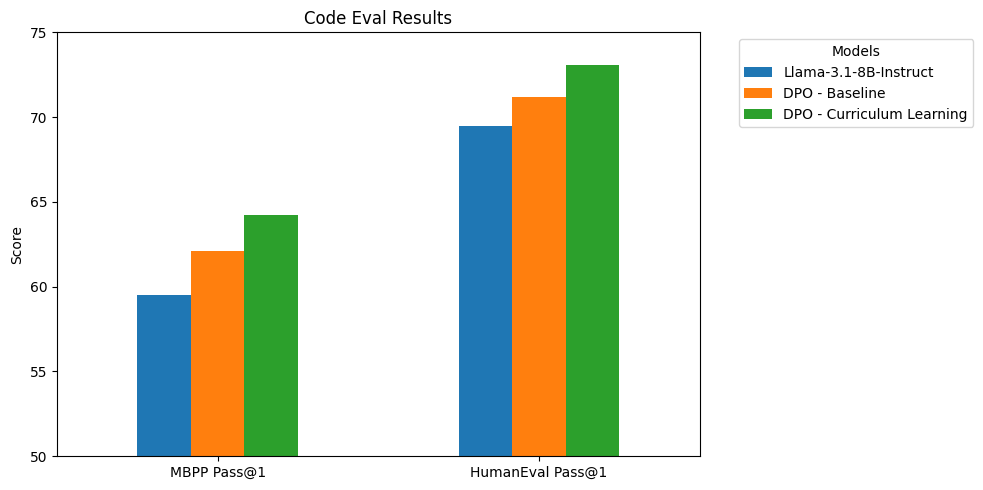

In [68]:
eval_results_df_inverted = eval_results_df.copy()
eval_results_df_inverted.set_index("name", inplace=True)
eval_results_df_inverted = eval_results_df_inverted.T
ax = eval_results_df_inverted.plot(kind="bar", figsize=(10, 5), title="Code Eval Results")

ax.set_ylim(50, 75)
# Customize the plot
plt.xticks(rotation=0)  # Keep group labels horizontal
plt.ylabel("Score")
plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()